# USP test of on continuous data

We demonstrate how the [USP test of independence](https://doi.org/10.1098/rspa.2021.0549) can be applied to continuous data.

A test of independence is stronger than a test for zero correlation. A test of independence can also detect dependencies which give zero correlation. 

In [1]:
from resample import permutation as perm
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.default_rng(1)

x1 = rng.normal(0, 2, size=100)
y1 = rng.normal(0, 3, size=100)

cov = np.empty((2, 2))
cov[0, 0] = 2 ** 2
cov[1, 1] = 3 ** 2
rho = 0.5
cov[0, 1] = rho * np.sqrt(cov[0, 0] * cov[1, 1])
cov[1, 0] = cov[0, 1]

xy2 = rng.multivariate_normal([0, 0], cov, size=500)

d = {"x,y are independent": (x1, y1), "x,y are correlated": xy2.T}

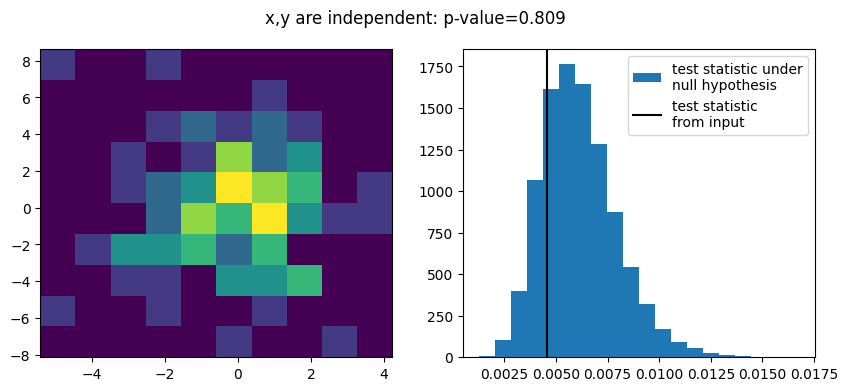

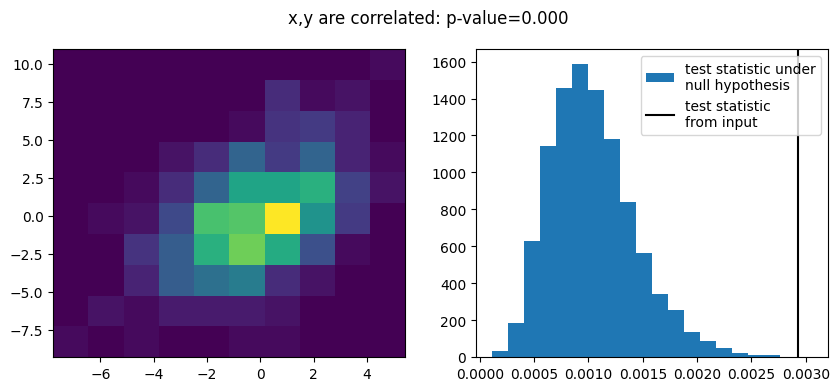

In [2]:
for label, (x, y) in d.items():
    # input is a histogram
    w, xe, ye = np.histogram2d(x, y)

    # apply USP test
    r = perm.usp(w, random_state=1)

    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    plt.sca(ax[0])
    plt.pcolormesh(xe, ye, w.T)
    plt.sca(ax[1])
    plt.hist(r.samples, bins=20, label="test statistic under\nnull hypothesis")
    plt.axvline(r.statistic, color="k", label="test statistic\nfrom input")
    plt.suptitle(f"{label}: p-value={r.pvalue:.3f}")
    plt.legend()